In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [ ]:
dataset = pd.read_excel("Bangladesh_Crime_Data.xlsx", sheet_name="Sheet1")

In [ ]:
dataset

,Year,District,Population,Murder,Kidnapping,Crime Against Women,Crime Against Children,Crime Committed by Juveniles,Crime Against Senior Citizen,Drug Trafficking,Theft,Rape,Robbery
0,2015,Bagerhat,25,23,6,46,5,2,4,3,32,11,9
1,2015,Bandarban,22,11,11,20,16,6,9,8,20,8,5
2,2015,Barguna,13,11,12,36,5,7,3,5,40,3,1
3,2015,Barisal,13,22,4,10,13,2,8,12,25,8,6
4,2015,Bhola,15,20,15,43,18,6,3,12,27,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,2023,Sirajganj,16,5,14,21,5,3,1,6,29,5,6
563,2023,Sunamganj,11,7,15,45,7,4,2,12,24,11,5
564,2023,Sylhet,13,21,4,20,5,6,9,12,15,7,2
565,2023,Tangail,21,14,6,22,6,3,8,14,28,13,10


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          567 non-null    int64 
 1   District                      567 non-null    object
 2   Population                    567 non-null    int64 
 3   Murder                        567 non-null    int64 
 4   Kidnapping                    567 non-null    int64 
 5   Crime Against Women           567 non-null    int64 
 6   Crime Against Children        567 non-null    int64 
 7   Crime Committed by Juveniles  567 non-null    int64 
 8   Crime Against Senior Citizen  567 non-null    int64 
 9   Drug Trafficking              567 non-null    int64 
 10  Theft                         567 non-null    int64 
 11  Rape                          567 non-null    int64 
 12  Robbery                       567 non-null    int64 
dtypes: int64(12), object

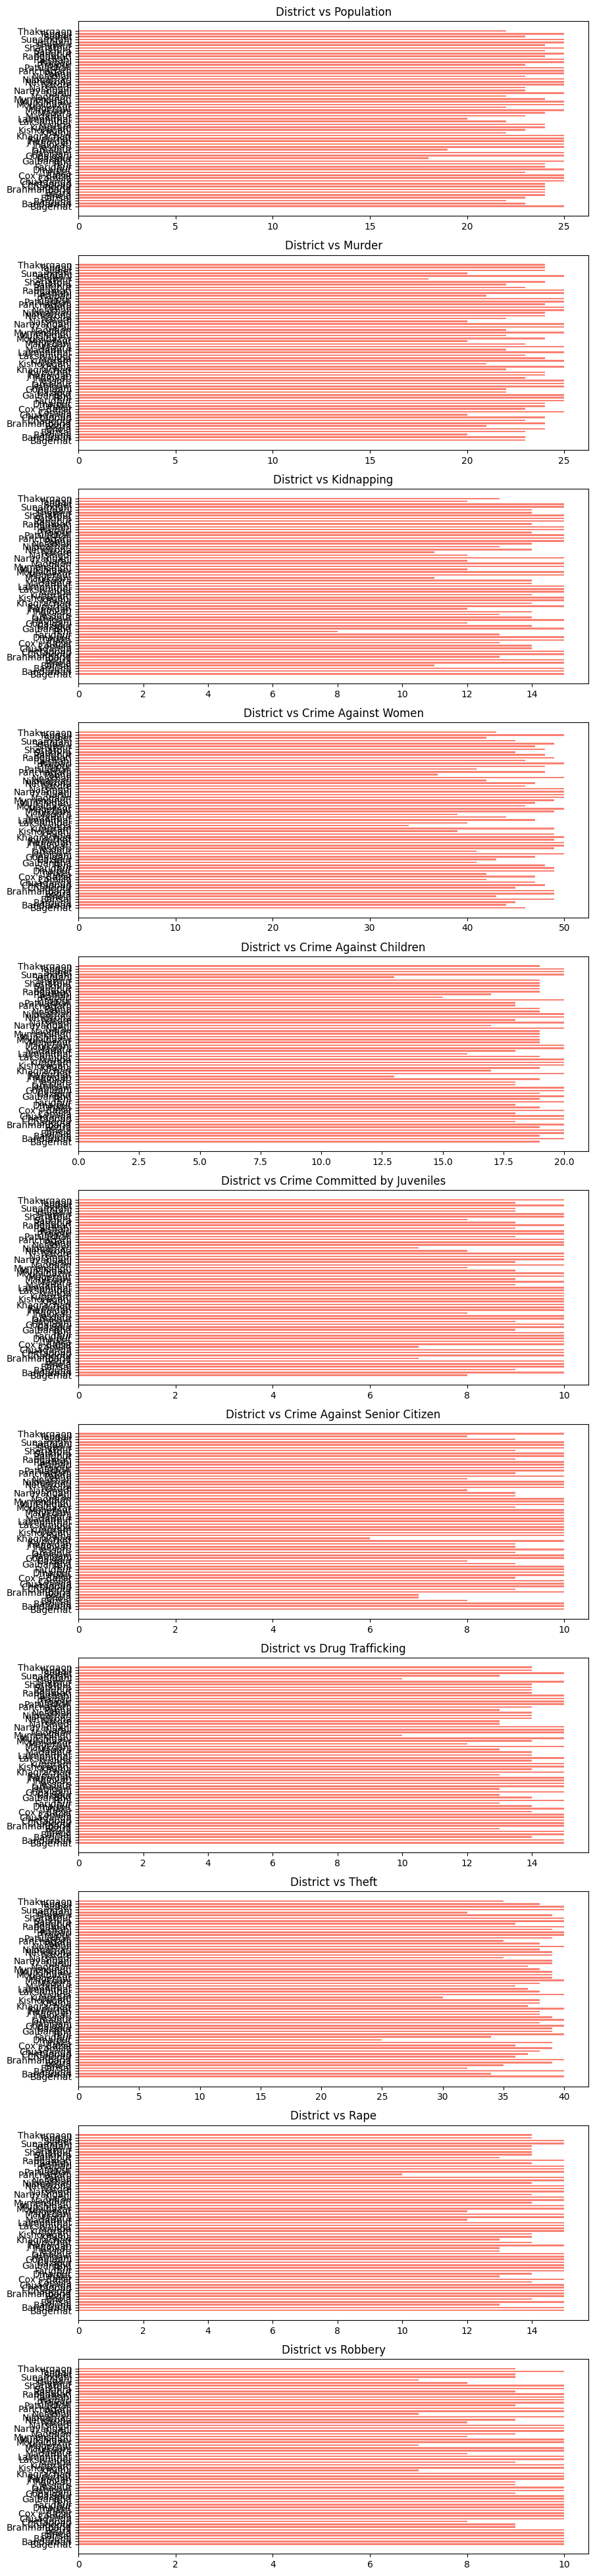

In [ ]:
fig, ax = plt.subplots(11, 1, figsize=(10, 50))

for i in range(0, 11):
    ax[i].barh(dataset['District'], dataset[dataset.columns[i+2]], 0.6, color='Salmon')
    ax[i].set_title('District vs ' + dataset.columns[i+2])
plt.show()

In [ ]:
new_df = pd.DataFrame(columns=['Year', 'District', 'Population', 'Number Of Cases', 'Type'])
for i in range(3, 13):
    temp = dataset[['Year', 'District', 'Population']].copy()
    temp['Number Of Cases'] = dataset[[dataset.columns[i]]]
    temp['Type'] = dataset.columns[i]

    new_df = pd.concat([new_df, temp])

In [ ]:
new_df

,Year,District,Population,Number Of Cases,Type
0,2015,Bagerhat,25,23,Murder
1,2015,Bandarban,22,11,Murder
2,2015,Barguna,13,11,Murder
3,2015,Barisal,13,22,Murder
4,2015,Bhola,15,20,Murder
...,...,...,...,...,...
562,2023,Sirajganj,16,6,Robbery
563,2023,Sunamganj,11,5,Robbery
564,2023,Sylhet,13,2,Robbery
565,2023,Tangail,21,10,Robbery


In [ ]:
new_df['Crime Rate'] = new_df['Number Of Cases'] / new_df['Population']

In [ ]:
new_df

,Year,District,Population,Number Of Cases,Type,Crime Rate
0,2015,Bagerhat,25,23,Murder,0.92
1,2015,Bandarban,22,11,Murder,0.5
2,2015,Barguna,13,11,Murder,0.846154
3,2015,Barisal,13,22,Murder,1.692308
4,2015,Bhola,15,20,Murder,1.333333
...,...,...,...,...,...,...
562,2023,Sirajganj,16,6,Robbery,0.375
563,2023,Sunamganj,11,5,Robbery,0.454545
564,2023,Sylhet,13,2,Robbery,0.153846
565,2023,Tangail,21,10,Robbery,0.47619


In [ ]:
new_df = new_df.drop(['Number Of Cases'], axis=1)

In [ ]:
new_df

,Year,District,Population,Type,Crime Rate
0,2015,Bagerhat,25,Murder,0.92
1,2015,Bandarban,22,Murder,0.5
2,2015,Barguna,13,Murder,0.846154
3,2015,Barisal,13,Murder,1.692308
4,2015,Bhola,15,Murder,1.333333
...,...,...,...,...,...
562,2023,Sirajganj,16,Robbery,0.375
563,2023,Sunamganj,11,Robbery,0.454545
564,2023,Sylhet,13,Robbery,0.153846
565,2023,Tangail,21,Robbery,0.47619


In [ ]:
new_df.to_excel("new_dataset.xlsx", index=False, sheet_name ='Sheet1')

In [ ]:
new_dataset = pd.read_excel("new_dataset.xlsx", sheet_name="Sheet1")

In [ ]:
new_dataset

,Year,District,Population,Type,Crime Rate
0,2015,Bagerhat,25,Murder,0.920000
1,2015,Bandarban,22,Murder,0.500000
2,2015,Barguna,13,Murder,0.846154
3,2015,Barisal,13,Murder,1.692308
4,2015,Bhola,15,Murder,1.333333
...,...,...,...,...,...
5665,2023,Sirajganj,16,Robbery,0.375000
5666,2023,Sunamganj,11,Robbery,0.454545
5667,2023,Sylhet,13,Robbery,0.153846
5668,2023,Tangail,21,Robbery,0.476190


In [ ]:
new_dataset.describe()

,Year,Population,Crime Rate
count,5670.000000,5670.000000,5670.000000
mean,2019.000000,17.548501,0.770200
std,2.582217,4.618907,0.670352
min,2015.000000,10.000000,0.040000
25%,2017.000000,14.000000,0.333333
50%,2019.000000,17.000000,0.571429
75%,2021.000000,22.000000,1.000000
max,2023.000000,25.000000,4.800000


In [ ]:
le = LabelEncoder()

In [ ]:
new_dataset['District'] = le.fit_transform(new_dataset['District'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [ ]:
# Saving the mapping file for further use
file = open('District_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Bagerhat - 0

Bandarban - 1

Barguna - 2

Barisal - 3

Bhola - 4

Bogra - 5

Brahmanbaria - 6

Chandpur - 7

Chittagong - 8

Chuadanga - 9

Comilla - 10

Cox's Bazar - 11

Dhaka - 12

Dinajpur - 13

Faridpur - 14

Feni - 15

Gaibandha - 16

Gazipur - 17

Gopalganj - 18

Habiganj - 19

Jamalpur - 20

Jessore - 21

Jhalokati - 22

Jhenaidah - 23

Joypurhat - 24

Khagrachari - 25

Khulna - 26

Kishoreganj - 27

Kurigram - 28

Kushtia - 29

Lakshmipur - 30

Lalmonirhat - 31

Madaripur - 32

Magura - 33

Manikganj - 34

Meherpur - 35

Moulvibazar - 36

Munshiganj - 37

Mymensingh - 38

Naogaon - 39

Narail - 40

Narayanganj - 41

Narsingdi - 42

Natore - 43

Netrokona - 44

Nilphamari - 45

Noakhali - 46

Pabna - 47

Panchagarh - 48

Patuakhali - 49

Pirojpur - 50

Rajbari - 51

Rajshahi - 52

Rangamati - 53

Rangpur - 54

Satkhira - 55

Shariatpur - 56

Sherpur - 57

Sirajganj - 58

Sunamganj - 59

Sylhet - 60

Tangail - 61

Thakurgaon - 62



In [ ]:
new_dataset['Type'] = le.fit_transform(new_dataset['Type'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [ ]:
# Saving the mapping file for further use
file = open('Type_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Crime Against Children - 0

Crime Against Senior Citizen - 1

Crime Against Women - 2

Crime Committed by Juveniles - 3

Drug Trafficking - 4

Kidnapping - 5

Murder - 6

Rape - 7

Robbery - 8

Theft - 9



In [ ]:
new_dataset

,Year,District,Population,Type,Crime Rate
0,2015,0,25,6,0.920000
1,2015,1,22,6,0.500000
2,2015,2,13,6,0.846154
3,2015,3,13,6,1.692308
4,2015,4,15,6,1.333333
...,...,...,...,...,...
5665,2023,58,16,8,0.375000
5666,2023,59,11,8,0.454545
5667,2023,60,13,8,0.153846
5668,2023,61,21,8,0.476190


In [ ]:
x = new_dataset[new_dataset.columns[0:4]].values
x

array([[2015,    0,   25,    6],
       [2015,    1,   22,    6],
       [2015,    2,   13,    6],
       ...,
       [2023,   60,   13,    8],
       [2023,   61,   21,    8],
       [2023,   62,   16,    8]])

In [ ]:
y = new_dataset['Crime Rate'].values
y

array([0.92      , 0.5       , 0.84615385, ..., 0.15384615, 0.47619048,
       0.3125    ])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [ ]:
model1 = svm.SVR()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4392595300051954
Mean Squared Error: 0.5024220358325541
R2 score: -0.056658523804996364


In [ ]:
model2 = KNeighborsRegressor(n_neighbors=2)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.6551607757949715e-05
Mean Squared Error: 7.913724956642526e-09
R2 score: -0.07359617923877293


In [ ]:
model3 = tree.DecisionTreeRegressor()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.37274733268238713
Mean Squared Error: 0.2980160813523419
R2 score: 0.3732336360006614


In [ ]:
model4 = RandomForestRegressor(random_state=0)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.535104759625449e-05
Mean Squared Error: 3.183210137346611e-09
R2 score: 0.5681575667725316


In [ ]:
model5 = MLPRegressor(random_state=0)
model5.fit(x_train, y_train)
y_pred = model5.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 10.688915378638201
Mean Squared Error: 324.4510998508546
R2 score: -44015866491.468704


In [ ]:
import pickle

In [ ]:
#saving the model as .pkl file
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model4, file)

In [ ]:
#checking the saved model accuracy
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
score = pickle_model.score(x_test, y_test)
print(score)

0.6114978483185012
